# Goals of the Laboratory
In this introductory laboratory, we expect students to:

1. Acquire basic knowledge about Python and Matplotlib
2. Gain familiarity with Juypter Notebooks
3. Gain familiarity with the PySpark API

To achieve such goals, we will go through the following steps:

1. In section 1, **IPython** and **Jupyter Notebooks** are introduced to help students understand the environment used to work on projects, including those that are part of the CLOUDS course.

2. In section 2, we briefly overview **Python** and its syntax. In addition, we cover **Matplotlib**, a very powerful library to plot figures in Python. Finally, we introduce **Pandas**, a python library that is very helpful when manipulating data.

3. In section 3 we cover the **PySpark** APIs

# 1. Python, IPython and Jupyter Notebooks

**Python** is a high-level, dynamic, object-oriented programming language. It is a general purpose language, which is designed to be easy to use and easy to read.

**IPython** (Interactive Python) is originally developed for Python. Now, it is a command shell for interactive computing supporting multiple programming languages. It offers rich media, shell syntax, tab completion, and history. IPython is based on an architecture that provides parallel and distributed computing. IPython enables parallel applications to be developed, executed, debugged and monitored interactively.

**Jupyter Notebooks** are a web-based interactive computational environment for creating IPython notebooks. An IPython notebook is a JSON document containing an ordered list of input/output cells which can contain code, text, mathematics, plots and rich media. Notebooks make data analysis easier to perform, understand and reproduce. All laboratories in this course are prepared as Notebooks. As you can see, in this Notebook, we can put text, images, hyperlinks, source code... The Notebooks can be converted to a number of open standard output formats (HTML, HTML presentation slides, LaTeX, PDF, ReStructuredText, Markdown, Python) through `File` -> `Download As` in the web interface. In addition, Jupyter manages the notebooks' versions through a `checkpoint` mechanism. You can create checkpoint anytime via `File -> Save and Checkpoint`. 

**NOTE on Checkpointing:** in this course, we use a peculiar environment to work. We don't have a Notebook server: instead, we create on demand clusters with a Notebook front-end. Since your clusters are **ephemeral** (they are terminated after a predefined amount of time), checkpointing is of little use, for anything else than saving your notebook in your ephemeral environment. It is far better to download regularly your notebooks, and to push them to your git repository.

## 1.1. Tab completion

Tab completion is a convenient way to explore the structure of any object you're dealing with. Simply type object_name.<TAB> to view the suggestion for object's attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [3]:
s = "test function of tab completion"

# type s.<TAB> to see the suggestions

# Show your experiments working on a string. 
# Try splitting a string into its constituent words, and count the number of words.


## 1.2. System shell commands

To run any command in the system shell, simply prefix it with `!`. For example:

In [4]:
# list all file and directories in the current folder
!ls

## 1.3. Magic functions

IPython has a set of predefined `magic functions` that you can call with a command line style syntax. There are two types of magics, line-oriented and cell-oriented. 

**Line magics** are prefixed with the `%` character and work much like OS command-line calls: they get as an argument the rest of the line, *where arguments are passed without parentheses or quotes*. 

**Cell magics** are prefixed with a double `%%`, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [5]:
%timeit range(1000)

In [6]:
%%timeit x = range(10000)
max(x)

For more information, you can follow this [link](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb)

## 1.4. Debugging

Whenever an exception occurs, the call stack is printed out to help you to track down the true source of the problem. It is important to gain familiarity with the call stack, especially when using the PySpark API.

In [7]:
for i in [4,3,2,0]:
    print(5/i)

## 1.5. Additional features

Jupyter also supports viewing the status of the cluster and interact with the real shell environment.

To do that, you can click on the Logo Jupyter in the up-left corner of each notebook to go to the dashboard:

<img src="https://farm2.staticflickr.com/1488/24681339931_733acb3494_b.jpg" width="600px" />

You can easily find out how to use these features, so you're invited to play around!!

# 2. Python + Pandas + Matplotlib: A great environment for Data Science

This section aims to help students gain a basic understanding of the python programming language and some of its libraries, including `Pandas` or `Matplotlib`. 

When working with a small dataset (one that can comfortably fit into a single machine), Pandas and Matplotlib, together with Python are valid alternatives to other popular tools such as R and Matlab. Using such libraries allows to inherit from the simple and clear Python syntax, achieve very good performance, enjoy superior memory management,  error handling, and good package management \[[1](http://ajminich.com/2013/06/22/9-reasons-to-switch-from-matlab-to-python/)\].


## 2.1. Python syntax

(This section is for students who did not program in Python before. If you're familiar with Python, please move to the next section: 1.2. Numpy)

When working with Python, the code seems to be simpler than (many) other languages. In this laboratory, we compare the Python syntax to that of Java - another very common language.

```java
// java syntax
int i = 10;
string s = "advanced machine learning";
System.out.println(i);
System.out.println(s);
// you must not forget the semicolon at the end of each sentence
```

In [8]:
# python syntax
i = 10
s = "advanced machine learning"
print(i)
print(s)
# forget about the obligation of commas

### Indentation & If-else syntax
In python, we don't use `{` and `}` to define blocks of codes: instead, we use indentation to do that. **The code within the same block must have the same indentation**. For example, in java, we write:
```java
string language = "Python";

// the block is surrounded by { and }
// the condition is in ( and )
if (language == "Python") {
    int x = 1;
    x += 10;
       int y = 5; // a wrong indentation isn't problem
    y = x + y;
    System.out.println(x + y);
    
    // a statement is broken into two line
    x = y
        + y;
    
    // do some stuffs
}
else if (language == "Java") {
    // another block
}
else {
    // another block
}
```

In [1]:
language = "Python"
if language == "Python":
    x = 10
    x += 10
    y = 5 # all statements in the same block must have the same indentation
    y = (
        x + y
    ) # statements can be on multiple lines, using ( )
    print (x 
           + y)
    
    # statements can also be split on multiple lines by using \ at the END of each line
    x = y \
        + y
    
    # do some other stuffs
elif language == "Java":
    # another block
    pass
else:
    # another block
    pass

45


### Ternary conditional operator
In python, we often see ternary conditional operator, which is used to assign a value to a variable based on some condition. For example, in java, we write:

```java
int x = 10;
// if x > 10, assign y = 5, otherwise, y = 15
int y = (x > 10) ? 5 : 15;

int z;
if (x > 10)
    z = 5; // it's not necessary to have { } when the block has only one statement
else
    z = 15;
```

Of course, although we can easily write these lines of code in an `if else` block to get the same result, people prefer ternary conditional operator because of simplicity.

In python, we write:

In [10]:
x = 10
# a very natural way
y = 5 if x > 10 else 15
print(y)

# another way
y = x > 10 and 5 or 15
print(y)

### Lists and For loops
Another syntax that we should revisit is the `for loop`. In java, we can write:

```java
// init an array with 10 integer numbers
int[] array = new int[]{1, 2, 3, 4, 5, 6, 7, 8, 9, 10};
for (int i = 0; i < array.length; i++){
    // print the i-th element of array
    System.out.println(array[i]);
}
```

In Python, instead of using an index to help indicating an element, we can access the element directly:

In [11]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Python has no built-in array data structure
# instead, it uses "list" which is much more general 
# and can be used as a multidimensional array quite easily.
for element in array:
    print(element)

As we can see, the code is very clean. If you need the index of each element, here's what you should do:

In [12]:
for (index, element) in enumerate(array):
    print(index, element)

Actually, Python has no built-in array data structure. It uses the `list` data structure, which is much more general and can be used as a multidimensional array quite easily. In addition, elements in a list can be retrieved in a very concise way. For example, we create a 2d-array with 4 rows. Each row has 3 elements.

In [13]:
# 2-dimentions array with 4 rows, 3 columns
twod_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
for index, row in enumerate(twod_array):
    print("row ", index, ":", row)

# print row 1 until row 3
print("row 1 until row 3: ", twod_array[1:3])

# all rows from row 2
print("all rows from row 2: ", twod_array[2:])

# all rows until row 2
print("all rows until row 2:", twod_array[:2])

# all rows from the beginning with step of 2. 
print("all rows from the beginning with step of 2:", twod_array[::2])

### Dictionaries
Another useful data structure in Python is a `dictionary`, which we use to store (key, value) pairs. Here's some example usage of dictionaries:

In [14]:
d = {'key1': 'value1', 'key2': 'value2'}  # Create a new dictionary with some data
print(d['key1'])       # Get an entry from a dictionary; prints "value1"
print('key1' in d)     # Check if a dictionary has a given key; prints "True"
d['key3'] = 'value3'    # Set an entry in a dictionary
print(d['key3'])      # Prints "value3"
# print(d['key9'])  # KeyError: 'key9' not a key of d
print(d.get('key9', 'custom_default_value'))  # Get an element with a default; prints "custom_default_value"
print(d.get('key3', 'custom_default_value'))    # Get an element with a default; prints "value3"
del d['key3']        # Remove an element from a dictionary
print(d.get('key3', 'custom_default_value')) # "fish" is no longer a key; prints "custom_default_value"


### Functions
In Python, we can define a function by using keyword `def`.

In [15]:
def square(x):
    return x*x

print(square(5))

You can apply a function to each element of a list/array by using `lambda` function. For example, we want to square elements in a list:

In [16]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# apply function "square" on each element of "array"
print(list(map(lambda x: square(x), array)))

# or using a for loop, and a list comprehension
print([square(x) for x in array])

print("orignal array:", array)

These two above syntaxes are used very often. 

If you are not familiar with **list comprehensions**, follow this [link](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html]).

We can also put a function `B` inside a function `A` (that is, we can have nested functions). In that case, function `B` is only accessed inside function `A` (the scope that it's declared). For example:

In [17]:
# select only the prime number in array
# and square them
def filterAndSquarePrime(arr):
    
    # a very simple function to check a number is prime or not
    def checkPrime(number):
        for i in range(2, int(number/2)):
            if number % i == 0:
                return False
        return True
    
    primeNumbers = filter(lambda x: checkPrime(x), arr)
    return map(lambda x: square(x), primeNumbers)

# we can not access checkPrime from here
# checkPrime(5)

result = filterAndSquarePrime(array)
list(result)

### Importing modules, functions
Modules in Python are packages of code. Putting code into modules helps increasing the reusability and maintainability.
The modules can be nested.
To import a module, we simple use syntax: `import <module_name>`. Once it is imported, we can use any functions, classes inside it.

In [18]:
# import module 'math' to uses functions for calculating
import math

# print the square root of 16
print(math.sqrt(16))

# we can create alias when import a module
import numpy as np

print(np.sqrt(16))

Sometimes, you only need to import some functions inside a module to avoid loading the whole module into memory. To do that, we can use syntax: `from <module> import <function>`

In [19]:
# only import function 'sin' in package 'math'
from math import sin

# use the function
print(sin(60))

That's quite enough for Python. Now, let's practice a little bit.

### Question 1
#### Question 1.1
<div class="alert alert-info">
Write a function `checkSquareNumber` to check if a integer number is a square number or not. For example, 16 and 9 are square numbers. 15 isn't square number.
Requirements:

- Input: an integer number

- Output: `True` or `False`

HINT: If the square root of a number is an integer number, it is a square number.
</div>

```python
import math

def checkSquareNumber(x):
    # calculate the square root of x
    # return True if square root is integer, 
    # otherwise, return False
    return ...

print(checkSquareNumber(16))
print(checkSquareNumber(250))
```

#### Question 1.2
<div class="alert alert-info">
A list `list_numbers` which contains the numbers from 1 to 9999 can be constructed from: 

```python
list_numbers = range(0, 10000)
```

Extract the square numbers in `list_numbers` using function `checkSquareNumber` from question 1.1. How many elements in the extracted list ?
</div>

```python
list_numbers = ...
square_numbers = # try to use the filter method
print(square_numbers)
print(len(square_numbers))
```

#### Question 1.3
<div class="alert alert-info">
Using array slicing, select the elements of the list square_numbers, whose index is from 5 to 20 (zero-based index).
</div>

```python
print(square_numbers[...])
```

Next, we will take a quick look on Numpy - a powerful module of Python.

## 2.2. Numpy
Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.
### 2.2.1. Array
A numpy array is a grid of values, all of **the same type**, and is indexed by a tuple of nonnegative integers. Thanks to the same type property, Numpy has the benefits of [locality of reference](https://en.wikipedia.org/wiki/Locality_of_reference). Besides, many other Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. So, the speed of Numpy is often faster than using built-in datastructure of Python. When working with massive data with computationally expensive tasks, you should consider to use Numpy. 

The number of dimensions is the `rank` of the array; the `shape` of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [23]:
import numpy as np

# Create a rank 1 array
rank1_array = np.array([1, 2, 3])
print("type of rank1_array:", type(rank1_array))
print("shape of rank1_array:", rank1_array.shape)
print("elements in rank1_array:", rank1_array[0], rank1_array[1], rank1_array[2])

# Create a rank 2 array
rank2_array = np.array([[1,2,3],[4,5,6]])
print("shape of rank2_array:", rank2_array.shape)
print(rank2_array[0, 0], rank2_array[0, 1], rank2_array[1, 0])

### 2.2.2. Array slicing
Similar to Python lists, numpy arrays can be sliced. The different thing is that you must specify a slice for each dimension of the array because arrays may be multidimensional.

In [24]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = m_array[:2, 1:3]
print(b)

# we can only use this syntax with numpy array, not python list
print("value at row 0, column 1:", m_array[0, 1])

# Rank 1 view of the second row of m_array  
print("the second row of m_array:", m_array[1, :])

# print element at position (0,2) and (1,3)
print(m_array[[0,1], [2,3]])

### 2.2.3. Boolean array indexing
We can use boolean array indexing to check whether each element in the array satisfies a condition or use it to do filtering.

In [25]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Find the elements of a that are bigger than 2
# this returns a numpy array of Booleans of the same
# shape as m_array, where each value of bool_idx tells
# whether that element of a is > 3 or not
bool_idx = (m_array > 3)
print(bool_idx , "\n")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(m_array[bool_idx], "\n")

# We can combine two statements
print(m_array[m_array > 3], "\n")

# select elements with multiple conditions
print(m_array[(m_array > 3) & (m_array % 2 == 0)])


### 2.2.4. Datatypes
Remember that the elements in a numpy array have the same type. When constructing arrays, Numpy tries to guess a datatype when you create an array However, we can specify the datatype explicitly via an optional argument.

In [26]:
# let Numpy guess the datatype
x1 = np.array([1, 2])
print(x1.dtype)

# force the datatype be float64
x2 = np.array([1, 2], dtype=np.float64)
print(x2.dtype)

### 2.2.5. Array math
Similar to Matlab or R, in Numpy, basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [27]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
# mathematical function is used as operator
print("x + y =", x + y, "\n")

# mathematical function is used as function
print("np.add(x, y)=", np.add(x, y), "\n")

# Unlike MATLAB, * is elementwise multiplication
# not matrix multiplication
print("x * y =", x * y , "\n")
print("np.multiply(x, y)=", np.multiply(x, y), "\n")
print("x*2=", x*2, "\n")

# to multiply two matrices, we use dot function
print("x.dot(y)=", x.dot(y), "\n")
print("np.dot(x, y)=", np.dot(x, y), "\n")

# Elementwise square root
print("np.sqrt(x)=", np.sqrt(x), "\n")

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. In what follows, we work on a few more examples to reiterate the concept.

In [28]:
# declare two vectors
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print("v.dot(w)=", v.dot(w))
print("np.dot(v, w)=", np.dot(v, w))

# Matrix / vector product
print("x.dot(v)=", x.dot(v))
print("np.dot(x, v)=", np.dot(x, v))

# Matrix / matrix product
print("x.dot(y)=", x.dot(y))
print("np.dot(x, y)=", np.dot(x, y))

Additionally, we can do other aggregation computations on arrays such as `sum`, `nansum`, or `T`.

In [29]:
x = np.array([[1,2], [3,4]])

# Compute sum of all elements
print(np.sum(x))

# Compute sum of each column
print(np.sum(x, axis=0))

# Compute sum of each row
print(np.sum(x, axis=1))

# transpose the matrix
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v.T)  # Prints "[1 2 3]"

### Question 2

Given a 2D array:

```
 1  2  3  4
 5  6  7  8 
 9 10 11 12
13 14 15 16
```


#### Question 2.1
<div class="alert alert-info">
Print the all odd numbers in this array using `Boolean array indexing`.
</div>

```python
array_numbers = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])

print(...)
```

#### Question 2.2
<div class="alert alert-info">
Extract the second row and the third column in this array using `array slicing`.
</div>

```python
print(array_numbers[...])
print(array_numbers[...])
```

#### Question 2.3
<div class="alert alert-info">
Calculate the sum of diagonal elements.
</div>

```python
sum = 0
for i in range(0, ...):
    sum += array_numbers...
    
print(sum)
```

#### Question 2.4
<div class="alert alert-info">
Print elementwise multiplication of the first row and the last row using numpy's functions.

Print the inner product of these two rows.
</div>

```python
print(...)
print(...)
```

## 2.3. Matplotlib

As its name indicates, Matplotlib is a plotting library. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. The most important function in matplotlib is `plot`, which allows you to plot 2D data.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('custom y label')
plt.show()

In this case, we provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for us. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

In the next example, we plot figure with both x and y data. Besides, we want to draw dashed lines instead of the solid in default.

In [35]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')
plt.show()

plt.bar([1, 2, 3, 4], [1, 4, 9, 16], align='center')
# labels of each column bar
x_labels = ["Type 1", "Type 2", "Type 3", "Type 4"]
# assign labels to the plot
plt.xticks([1, 2, 3, 4], x_labels)

plt.show()

If we want to merge two figures into a single one, subplot is the best way to do that. For example, we want to put two figures in a stack vertically, we should define a grid of plots with 2 rows and 1 column. Then, in each row, a single figure is plotted.

In [36]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.bar([1, 2, 3, 4], [1, 4, 9, 16])

plt.show()

For more examples, please visit the [homepage](http://matplotlib.org/1.5.1/examples/index.html) of Matplotlib.

###  Question 3
Given a list of numbers from 0 to 9999.


#### Question 3.1
<div class="alert alert-info">
Calculate the histogram of numbers divisible by 3, 7, 11 in the list respectively.

( Or in other words, how many numbers divisible by 3, 7, 11 in the list respectively ?)
</div>

```python
arr = np.array(...)
divisors = [3, 7, 11]
histogram = list(...)
print(histogram)
```

#### Question 3.2
<div class="alert alert-info">
Plot the histogram in a line chart.
</div>

```python
%matplotlib inline
import matplotlib.pyplot as plt

# simple line chart
plt.plot(histogram)
x_indexes = ...
x_names = list(...)
plt.xticks(x_indexes, x_names)
plt.show()
```

#### Question 3.3
<div class="alert alert-info">
Plot the histogram in a bar chart.
</div>

```python
# char chart with x-lables
x_indexes = range(...)
x_names = list(...)
plt.bar( x_indexes, histogram, align='center')
plt.xticks(x_indexes, x_names)
plt.show()
```

## 2.4. Pandas

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Indeed, it is great for data manipulation, data analysis, and data visualization.

### 2.4.1. Data structures
Pandas introduces two useful (and powerful) structures: `Series` and `DataFrame`, both of which are built on top of NumPy.

#### Series
A `Series` is a one-dimensional object similar to an array, list, or even column in a table. It assigns a *labeled index* to each item in the Series. By default, each item will receive an index label from `0` to `N-1`, where `N` is the number items of `Series`.

We can create a Series by passing a list of values, and let pandas create a default integer index.


In [40]:
import pandas as pd
import numpy as np

# create a Series with an arbitrary list
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'])
print(s)

Or, an index can be used explicitly when creating the `Series`.

In [41]:
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'],
             index=['Col1', 'Col2', 'Col3', 4.1, 5])
print(s)

A `Series` can be constructed from a dictionary too.

In [42]:
s = pd.Series({
        'Col1': 3, 'Col2': 'Machine learning', 
        'Col3': 1.414259, 4.1: -65545, 
        5: 'Happy coding!'
    })
print(s)

We can access items in a `Series` in a same way as `Numpy`.

In [43]:
s = pd.Series({
        'Col1': 3, 'Col2': -10, 
        'Col3': 1.414259, 
        4.1: -65545, 
        5: 8
    })

# get element which has index='Col1'
print("s['Col1']=", s['Col1'], "\n")

# get elements whose index is in a given list
print("s[['Col1', 'Col3', 4.5]]=", s[['Col1', 'Col3', 4.5]], "\n")

# use boolean indexing for selection
print(s[s > 0], "\n")

# modify elements on the fly using boolean indexing
s[s > 0] = 15

print(s, "\n")

# mathematical operations can be done using operators and functions.
print(s*10,  "\n")
print(np.square(s), "\n")

#### DataFrame
A DataFrame is a tabular data structure comprised of rows and columns, akin to database table, or R's data.frame object. In a loose way, we can also think of a DataFrame as a group of Series objects that share an index (the column names).

We can create a DataFrame by passing a dict of objects that can be converted to series-like.

In [44]:
data = {'year': [2013, 2014, 2015, 2013, 2014, 2015, 2013, 2014],
        'team': ['Manchester United', 'Chelsea', 'Asernal', 'Liverpool', 'West Ham', 'Newcastle', 'Machester City', 'Tottenham'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

We can store data as a CSV file, or read data from a CSV file.

In [45]:
# save data to a csv file without the index
football.to_csv('football.csv', index=False)

from_csv = pd.read_csv('football.csv')
from_csv.head()

To read a CSV file with a custom delimiter between values and custom columns' names, we can use parameters `sep` and `names` relatively.
Moreover, Pandas also supports to read and write to [Excel file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel) , sqlite database file, URL,  or even clipboard.

We can have an overview on the data by using functions `info` and `describe`.

In [46]:
print(football.info(), "\n")
football.describe()

Numpy's regular slicing syntax works as well.

In [47]:
print(football[0:2], "\n")

# show only the teams that have won more than 10 matches from 2014
print(football[(football.year >= 2014) & (football.wins >= 10)])

An important feature that Pandas supports is `JOIN`. Very often, the data comes from multiple sources, in multiple files. For example, we have 2 CSV files, one contains the information of Artists, the other contains information of Songs. If we want to query the artist name and his/her corresponding songs, we have to do joining two dataframe.

Similar to SQL, in Pandas, you can do inner join, left outer join, right outer join and full outer join. Let's see a small example. Assume that we have two dataset of singers and songs. The relationship between two datasets is maintained by a constrain on `singer_code`.

In [48]:
singers = pd.DataFrame({'singer_code': range(5), 
                           'singer_name': ['singer_a', 'singer_b', 'singer_c', 'singer_d', 'singer_e']})
songs = pd.DataFrame({'singer_code': [2, 2, 3, 4, 5], 
                           'song_name': ['song_f', 'song_g', 'song_h', 'song_i', 'song_j']})
print(singers)
print('\n')
print(songs)

In [49]:
# inner join
pd.merge(singers, songs, on='singer_code', how='inner')

In [50]:
# left join
pd.merge(singers, songs, on='singer_code', how='left')

In [51]:
# right join
pd.merge(singers, songs, on='singer_code', how='right')

In [52]:
# outer join (full join)
pd.merge(singers, songs, on='singer_code', how='outer')

We can also concatenate two dataframes vertically or horizontally via function `concat` and parameter `axis`. This function is useful when we need to append two similar datasets or to put them side by site

In [53]:
# concat vertically
pd.concat([singers, songs])

In [54]:
# concat horizontally
pd.concat([singers, songs], axis=1)

When computing descriptive statistic, we usually need to aggregate data by each group. For example, to answer the question "how many songs each singer has?", we have to group data by each singer, and then calculate the number of songs in each group. Not that the result must contain the statistic of all singers in database (even if some of them have no song)

In [55]:
data = pd.merge(singers, songs, on='singer_code', how='left')

# count the values of each column in group
print(data.groupby('singer_code').count())

print("\n")

# count only song_name
print(data.groupby('singer_code').song_name.count())

print("\n")

# count song name but ignore duplication, and order the result
print(data.groupby('singer_code').song_name.nunique().sort_values(ascending=True))

### Question 4
We have two datasets about music: [song](https://github.com/michiard/AML-COURSE/blob/master/data/song.tsv) and [album](https://github.com/michiard/AML-COURSE/blob/master/data/album.tsv).

In the following questions, you **have to** use Pandas to load data and write code to answer these questions.


#### Question 4.1
<div class="alert alert-info">
Load both dataset into two dataframes and print the information of each dataframe

**HINT**: 

- You can click button `Raw` on the github page of each dataset and copy the URL of the raw file.
- The dataset can be load by using function `read_table`. For example: `df = pd.read_table(raw_url, sep='\t')`
</div>

```python
import pandas as pd

songdb_url = 'https://raw.githubusercontent.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/master/data/song.tsv'
albumdb_url = 'https://raw.githubusercontent.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/master/data/album.tsv'
song_df = pd...
album_df = pd...

print(song_df...)
print(album_df...)
```

#### Question 4.2
<div class="alert alert-info">
How many albums in this datasets ?

How many songs in this datasets ?
</div>

```python
print("number of albums:", album_df....count())
print("number of songs:", song_df.Song...)
```

#### Question 4.3
<div class="alert alert-info">
How many distinct singers in this dataset ?
</div>

```python
print("number distinct singers:", len(...))
```

#### Question 4.4
<div class="alert alert-info">
Is there any song that doesn't belong to any album ?

Is there any album that has no song ?

**HINT**: 

- To join two datasets on different key names, we use `left_on=` and `right_on=` instead of `on=`.
- Funtion `notnull` and `isnull` help determining the value of a column is missing or not. For example:
`df['song'].isnull()`.
</div>

```python
fulldf = pd.merge(song_df, album_df, how='outer', left_on='Album', right_on='Album code')
fulldf[fulldf['Song'].... & fulldf['Album']....]
```

```python
fulldf[fulldf['Song'].... & fulldf['Album code']....]
```

#### Question 4.5
<div class="alert alert-info">
How many songs in each albums of Michael Jackson ?
</div>

```python

# Try thinking like as for map reduce word count!!

fulldf[fulldf['Singer']=='Michael Jackson']....
```

# 3. PySpark

Spark is an alternative framework to Hadoop MapReduce, designed to make it easier and quicker to build and run distributed data manipulation algorithms. Spark comes with a library for machine learning (MLLib) and graph algorithms, and also supports real-time streaming and SQL syntax, via Spark Streaming and SparkSQL, respectively. Spark exposes the Spark programming model to Java, Scala, or Python. In Python, we use the PySpark API to interact with Spark.

As discussed in the CLOUDS lectures, every Spark application has a Spark driver. It is the program that declares the transformations and actions on RDDs of data and submits such requests to the cluster manager. Actually, the driver is the program that creates the `SparkContext`, connecting to a given cluster manager such as  Spark Master, YARN or others. The executors run user code, run computations and can cache data for your application. The `SparkContext` will create a job that is broken into stages. The stages are broken into tasks which are scheduled by the SparkContext on an executor.

When starting PySpark with command `pyspark` or using a well configured notebook (such as this one), `SparkContext` is created automatically in variable `sc`. 


In [1]:
sc

<SparkContext master=spark://spark-master0-757-prod2:7077 appName=pyspark-shell>

PySpark uses PySpark RDDs which  are just RDDs of Python objects: like Python lists, they can store objects with mixed types (actually all the objects are instances of `PyObject`).

When PySpark is started, it also starts a JVM, which is accessible through a socket. PySpark uses `Py4J` to handle this communication. The JVM works as the actual Spark driver, and loads a `JavaSparkContext` that communicates with the Spark executors across the cluster. Python API calls to the Spark Context object are then **translated into Java API calls** to the JavaSparkContext. For example, the implementation of PySpark's `sc.textFile()` dispatches a call to the `.textFile` method of the `JavaSparkContext`, which ultimately communicates with the Spark executor JVMs to load the text data from HDFS. 

![](http://i.imgur.com/YlI8AqEl.png)

The Spark executors on the cluster start a Python interpreter for each core, with which they communicate data through a pipe when they need to execute user-code. A Python RDD in the local PySpark client corresponds to a `PythonRDD` object in the local JVM. The data associated with the RDD actually lives in the Spark JVMs as Java objects. For example, running `sc.textFile()` in the Python interpreter will call the `JavaSparkContexts` `textFile` method, which loads the data as Java String objects in the cluster.


When an API call is made on the `PythonRDD`, any associated code (e.g., Python lambda function) **is serialized and distributed to the executors**. The data is then converted from Java objects to a Python-compatible representation (e.g., pickle objects) and streamed to executor-associated Python interpreters through a pipe. Any necessary Python processing is executed in the interpreter, and the resulting data is stored back as an RDD (as pickle objects by default) in the JVMs. 


The data is read easily by using functions of Spark Context. For example, to read a text file and count the number of lines, we can write:


In [2]:
# each line is stored as an element in 'input_file' - a PythonRDD.
input_file = sc.textFile("/datasets/gutenberg/gutenberg_tiny.txt")
num_lines = input_file.count()
print("The number of lines in the input file is:", num_lines)

## 3.0. Preliminaries: working with HDFS and using the Apache Spark Web UI to inspect jobs, tasks and many more metrics

Alright, so we have run our first Apache Spark program, and we learned how many lines it contains. But can we obtain some more information about this file? This is what we are going to do next.

As a side note, the reason why we are interested in learning more about our file is that it allows us to understand how the Apache Spark job operates on it. Specifically, we want to learn about its tasks, their performance, and many more interesting metrics and figures, such as for example the Directed Acyclic Graph representing the job. This kind of exercise is highly connected to the content we learned in class, and it's a good way to put in practice some notions that would otherwise remain only theoretical.

Since Apache Spark jobs generally operate on an input file, and that the way this file is stored determines to a large extent the degree of parallelism we can achieve with our Spark program, let's first focus on a few commands to interrogate the HDFS Name Node.

### Working with HDFS
A comfortable way to work with HDFS, albeit a bit geeky, is to use the command line. The nice thing about your Jupyter environment is that you can launch a terminal, which will give you access to one of the containers running your environment (the one where the Jupyter Notebook is running).

Next, we will look at our home directory in HDFS. Open up a terminal, or alternatively use some magic functions from the Notebook, and type the following command:

```
! hdfs dfs ls
```

NOTE: you'll probably land on an empty directory, as this is the first time you're using our system.

Next, we'll have a look at the directory we've used for the simple line count example from above:

```
! hdfs dfs ls /datasets/gutenberg
```

### Question 3.1
<div class="alert alert-info">
Using the hdfs command, inspect the file we've used before, located in /datasets/gutenberg/gutenberg_tiny.txt
</div>


* How many HDFS blocks constitute our file?
* Where are they located?
* What is the replication factor of our file?

**Hint**: you should lookup for the HDFS command line documentation to learn how to answer the questions above. Look for the sub-command called ```fsck```.

### Working with the Apache Spark Web UI
Next, we'll spend some time trying to understand the execution of our job. This requires a good grip on the notions you've learned in class, so you're invited to revise the lecture on Apache Spark.

The Apache Spark Web UI can be used to dissect the life of a job execution.

* Using the link available from the endpoints that Zoe created for you, open the Web UI: to be precise, we will use the Spark Mater Web UI, which gives you a broad view of your cluster, executors, and jobs.
* You'll see information about the worker machines of your cluster (number of cores, available memory, ...), and a list of applications. You'll see one running application, corresponding to the pyspark shell connected to your Jupyter Notebook. Click on its Application ID to inspect all the jobs this application has run.
* You will land on a general page with a summary of your pyspark shell application. Follow the *Application Detail UI*.

If this is the first time you execute the Notebook cell with the simple "line counting" job, you will see a single item in the job list. Pay attention to the job name: it corresponds to the name of the **Action** that fired the job, that is, the ```count``` action. At this level, you only see a coarse job summary: its submission time, its duration, and so on.

* Click on the job description. You will land on a page with a great deal of details about your job, starting with its stages (remember, jobs are made of stages, that are in turn made of tasks).
* Expand the sections about the **Event Timeline** and the **DAG visualization**.
* Next, click on the job stage with the same name as the **Action** ```count``` we specified in our code


### Question 3.2
<div class="alert alert-info">
Using the the Apache Spark Web UI, as explained above, answer the following questions:
</div>

* How many tasks were launched?
* What is the duration of each task?
* Hown many input bytes where processed by each task? How does this relate to the input file size?
* How many workers in total does your cluster have? How many workers were involved in your "line count" job?
* Given that we know how many HDFS blocks compose our input file (from Question 3.1), explain the number of tasks your job is broken into.



## 3.1. Wordcount example
In the example below, we are interested in the top-10 words in terms of frequency of occurrence. To do so, we use a small text file as an input, and we wish to plot the term frequency of such top-10 words using Matplotlib.

First, using the method `textFile` from the SparkContext `sc`, we create a RDD of strings. Each string in the RDD is representative for a line in the text file. In a loose way, we can think the first RDD is a RDD of lines. 

Because we work on the scope of words, we have to transform **a line** of the current RDD into **multiple words**, each word is an object of the new RDD. This is done by using `flatMap` function. 

Then, a `map` function transforms **each word** in the RDD into **a single** tuple with 2 components: the word itself and the count of 1. As you might have guessed, this is a PairRDD, where each object is a key-value pair. 

We can take advantage of function `reduceByKey` to sum all frequencies of the same word. Now, each element in the RDD is in the form of: (word, total_frequency). To sort the words by frequency of occurrence, we can use many approaches. One of the simplest approach is swap each tuple such that the frequency becomes the key, and use the `sortByKey` function.

In [5]:
words = (
            # read the text file
            sc.textFile("/datasets/gutenberg/gutenberg_tiny.txt")
            
            # construct words from lines
            .flatMap(lambda line: line.split())
            
            # map each word to (word, 1)
            .map(lambda x: (x, 1))
    
            # reduce by key: accumulate sum the freq of the same word
            .reduceByKey(lambda freq1, freq2: freq1 + freq2)
            
            # swap (word, freq) to (freq, word)
            .map(lambda x: (x[1], x[0]))
    
            # sort result by key DESC
            .sortByKey(False)
         )

Now the top-10 words are collected and sent back to the driver by using function `take`.

In [6]:
# top 10 words:
top10 = words.take(10)
print(top10)

[(247409, 'the'), (139696, 'of'), (132555, 'and'), (116905, 'to'), (101336, 'a'), (80870, 'I'), (73005, 'in'), (49093, 'that'), (42440, 'with'), (42264, 'you')]


The action `collect` gathers all elements of the RDD (that reside on multiple machines) to the driver (which is running in a single machine), and cast it as a list.

**ATTENTION** collecting an RDD in the driver can be problematic: indeed, an RDD can be very big in size (this is why they are distributed across several machines in the first place!) and thus it could deplete the RAM available in the machine running the driver!

In [5]:
# collect results from executors to the driver
# results = words.collect()
# If you want to have a look at the results, don't print them all, for otherwise the notebook size will be too big

Recall that there are two kinds of functions in Spark: **transformations** and **actions**. All functions `map`, `flatMap`, `reduceByKey`, `sortByKey` are transformation functions. They are not executed right away when called. Indeed, Spark is lazily evaluated, so nothing gets executed unless the driver invokes actions such as `count`, `take`, `collect`...

RDD transformations allow us to create dependencies between RDDs. Each RDD in the lineage chain (string of dependencies) has a function for calculating its data and has a pointer (dependency) to its parent RDD. Every time we use an RDD, dependencies are computed again from the beginning, which can be costly. Fortunately, we can use the function `cache` to instruct Spark to checkpoint in RAM (but eventually also on disk) a particular RDD.

Let's now use the previous results from the execution of our simple Spark word count job, to plot word frequency information.

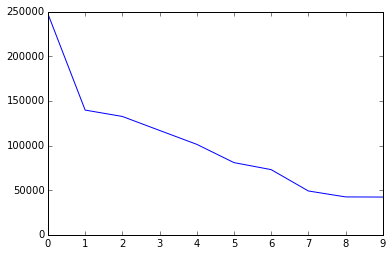

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# extract the frequencies from the result
frequencies = [x[0] for x in top10]

# plot the frequencies
plt.plot(frequencies)
plt.show()

## 3.2. Night flights example
We have a CSV file which contains the information about flights that took place in the US in 1994.
The data in this file has 29 columns such as `year`, `month`, `day_of_month`, `scheduled_departure_time`,...
We can have a quick look on the data:

In [8]:
! hdfs dfs -cat /datasets/airline/1994.csv | head -n 10

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1994,1,7,5,858,900,954,1003,US,227,NA,56,63,NA,-9,-2,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,8,6,859,900,952,1003,US,227,NA,53,63,NA,-11,-1,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,10,1,935,900,1023,1003,US,227,NA,48,63,NA,20,35,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,11,2,903,900,1131,1003,US,227,NA,148,63,NA,88,3,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,12,3,933,900,1024,1003,US,227,NA,51,63,NA,21,33,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,13,4,NA,900,NA,1003,US,227,NA,NA,63,NA,NA,NA,CLT,ORF,290,NA,NA,1,NA,0,NA,NA,NA,NA,NA
1994,1,14,5,903,900,1005,1003,US,227,NA,62,63,NA,2,3,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1994,1,15,6,859,900,1004,1003,US,227,NA,65,

In this simple example, we are interested only in columns: `CRSDepTime` (scheduled departure time) and `UniqueCarrier` (carrier identifier). The values of `CRSDepTime` are expressed in the format: hhmm (hour-minute).
Assume that a flight is considered as a 'night flight' if its scheduled departed time `CRSDepTime` is later than 18:00.

Questions:

- How many night flights do we have in our data ?
- How many night flights per unique carrier ? Plot the top-5 of them, in terms of volume

First, we read the data and remove the header. Then, from the lines, we extract the information of scheduled departure time and carrier.

In [9]:
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
# note that the scheduled time must be convert from string to interger number
def extract_CRSDepTime_Carier(line):
    cols = line.split(",")
    return (int(cols[5]), cols[8])

header = data.first()

# remove header
data_without_header = data.filter(lambda line: line != header)

# create a new RDD with only scheduled departure time and carrier information
# cache it for later usage
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               .cache()
          )


Function `filter` helps us select only the objects that satisfy a condition. In this case, it creates a new RDD by filtering out the header. We can also use it to select the night flights.

In [10]:
night_flights = newdata.filter(lambda f: f[0] > 1800).cache()
night_flights.take(3)

[(2030, 'US'), (2030, 'US'), (2030, 'US')]

We use `cache` because we don't want to recalculate `night_flights` from the beginning every time of using it.

In [11]:
# filter and count the night flights
num_night_flights = night_flights.count()
print(num_night_flights)

1078203


In [12]:
# group by carrier
night_flights_by_carrier = night_flights.groupBy(lambda x: x[1]).mapValues(lambda flights: len(flights))

# take top 5 carriers
top5_carriers = night_flights_by_carrier.takeOrdered(5, key=lambda x: -x[1])

print(top5_carriers)

[('DL', 208224), ('US', 170397), ('AA', 142832), ('WN', 124024), ('UA', 113640)]


We use `groupBy` to cluster flights which belong to the same carrier into a group. In this example, to select the top-5 carriers, we use a method based on the function `takeOrder`. This function takes the top-`k` objects ordered by an index: the trick is that we instruct it to use the cumulative counts as the key.

Let's plot a bar chart using Matplotlib. To draw a bar chart, we use function `bar` which requires two parameters. Each parameter is a list of float values in each dimension.

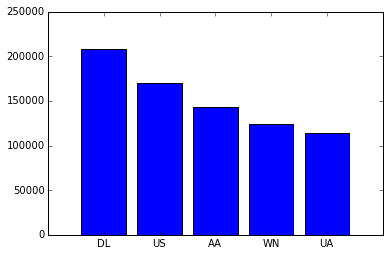

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
num_flights = [ x[1] for x in top5_carriers]

# extract the carriers' names
carrier_names = [x[0] for x in top5_carriers]

# create `virtual indexes for carriers which will be used as x-values`
carrier_indexes = range(0, len(carrier_names))

# plot
plt.bar(carrier_indexes, num_flights, align="center")

# put x-labels for the plot
plt.xticks(carrier_indexes, carrier_names)
plt.show()

## Question 5


### Question 5.1
<div class="alert alert-info">
Compute how many flights have a scheduled departure time later than 09:00 and before 14:00.
</div>

```python
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
# note that the scheduled time must be convert from string to interger number
def extract_CRSDepTime_Carier(line):
    ...
    ...
    return (int(cols[5]), cols[16])

header = data.first()

# remove header
data_without_header = data.filter(...)

# create RDD with only scheduled departure time and carrier information
# cache it for later usages
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               ...
          )

flights = newdata.filter(...).cache()

print(flights.count())
```

### Question 5.2
<div class="alert alert-info">
Compute the cumulative number flights that have a scheduled departure time after 09:00 and before 14:00, for each source airport (origin). Plot the top-5 of such airports.
</div>

```python
flights_per_carrier = flights.groupBy(...).mapValues(...)

# take top 5 source airports
top5_source_airport = flights_per_carrier.takeOrdered(...)

%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
# This is called list comprehension
num_flights = [ x[1] for x in top5_source_airport]

# create `virtual indexes for carriers which will be used as x-values`
airport_indexes = range(0, len(top5_source_airport))

# plot
plt.bar(airport_indexes, num_flights, align="center")

# extract the carriers' names
airport_names = [ x[0] for x in top5_source_airport]

# put x-labels for the plot
plt.xticks(airport_indexes, airport_names)
plt.show()
```

# Summary

In this lecture, we gained familiarity with the Jupyter Notebook environment, the Python programming language and its modules. In particular, we covered the Python syntax, Numpy - the core library for scientific computing, Matplotlib - a module to plot graphs, Pandas - a data analysis module. Besides, we started to gain practical experience with PySpark, using, for the moment, small data sets.

# References
This notebook is inspired from:

- [Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)